In [1]:
##############
# Q-Learning #
##############

In [2]:
import numpy as np
import random

In [3]:
dimensiones =(5,5)
estado_inicial =(0,0)
estado_objetivo = (4,4)
obstaculos = [(1,1), (1,3), (2,3), (3,0)]
acciones = [(-1,0), (1,0), (0,1),(0,-1)]

In [4]:

num_estados = dimensiones[0] * dimensiones[1]
num_estados

25

In [5]:
num_acciones=len(acciones)
num_acciones

4

In [6]:
Q = np.zeros((num_estados, num_acciones))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
def estado_a_indice(estado):
    return estado[0] * dimensiones[1] + estado[1]

In [8]:
ejemplo = estado_a_indice((1,0))
ejemplo

5

In [9]:
# Alfa Controla cuanto se actualiza el valor Q en cada paso del aprendizaje, entre mas alto es mayor el peso
# de la información mas reciente lo que permite un aprendisaje mas rapido pero menos estable.
# Gamma es el factor de descuento que controla la importancia entre las recompensas futuras(1) y las recompensas 
# inmediatas(0). epsilon sirve para hacer que el programa no tome las mismas desiciones haciendo que tome una accion
# aleatoria. episiodios es numero de veces que se repite el entrenamiento inicia con el estado inicial y termina 
# cuando se alcanza el obketivo o algun otro criterio de terminacion
alpha=0.1
gamma=0.99
epsilon=0.2
episodios=100

In [10]:
def elegir_accion(estado):
    if random.uniform(0,1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado_a_indice(estado)])

In [11]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado=tuple(np.add(estado, accion) % dimensiones)
    if nuevo_estado in obstaculos or nuevo_estado == estado:
        return estado, -100, False
    if nuevo_estado == estado_objetivo:
        return nuevo_estado, 100, True
    return nuevo_estado, -1, False

In [12]:
for episodio in range(episodios):
    estado = estado_inicial
    terminado=False
    while not terminado:
        idx_estado = estado_a_indice(estado)
        accion_idx = elegir_accion(estado)
        nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
        idx_nuevo_estado = estado_a_indice(nuevo_estado)

        Q[idx_estado, accion_idx] = Q[idx_estado, accion_idx] + alpha  + (recompensa +gamma *np.max(Q[idx_nuevo_estado]) -Q[idx_estado, accion_idx])
        estado=nuevo_estado

In [17]:
politica = np.zeros(dimensiones, dtype=int)
politica

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [21]:
for i in range(dimensiones[0]):
    for j in range(dimensiones[1]):
        estado =(i,j)
        idx_estado = estado_a_indice(estado)
        mejor_accion = np.argmax(Q[idx_estado])
        politica[i,j] = mejor_accion

print("Politica aprendida: 0 es arriba, 1 es abajo, 2 es izquierda y 3 es derecha")
print(politica)

Politica aprendida: 0 es arriba, 1 es abajo, 2 es izquierda y 3 es derecha
[[0 3 2 2 0]
 [3 0 1 0 0]
 [3 3 1 0 0]
 [0 2 0 1 1]
 [3 3 2 2 0]]


In [13]:
##############
# SARSA #
##############

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
dimensiones = (4,4)
estado_inicial = (0,0)
estado_objetivo = (3,3)
acciones = [(0,-1), (0,1), (-1,0), (1,0)]
acciones_simbolos= ["↑","↓","→","←"]

In [16]:
numero_estados = dimensiones[0] * dimensiones[1]
numero_estados

16

In [17]:
numero_acciones = len(acciones)
numero_acciones

4

In [18]:
Q = np.zeros((numero_estados, numero_acciones))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
# Parametros sarsa
alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodios= 1000

In [20]:
#funciones para sarsa
def estado_a_indice(estado):
    return estado[0] * dimensiones[1] + estado[1] 

In [21]:
estado_a_indice((3,0))

12

In [22]:
def elegir_accion(estado):
    if random.uniform(0,1) < epsilon:
        return random.randint(0, numero_acciones-1)
    else:
        return np.argmax(Q[estado_a_indice(estado)])


In [23]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado = tuple(np.add(estado, accion) % np.array(dimensiones))

    if nuevo_estado == estado_objetivo:
        recompensa = 1
    else:
        recompensa= -1

    return nuevo_estado, recompensa, nuevo_estado == estado_objetivo

In [24]:
for episodio in range(episodios):
    estado = estado_inicial
    accion_idx = elegir_accion(estado)
    terminado = False

    while not terminado:
        nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
        nueva_accion_idx = elegir_accion(nuevo_estado)

        indice = estado_a_indice(estado)
        Q[indice, accion_idx] += alpha * (recompensa + gamma *Q[estado_a_indice(nuevo_estado), nueva_accion_idx] - Q[indice, accion_idx])

        estado, accion_idx = nuevo_estado, nueva_accion_idx

In [25]:
politica_simbolos = np.empty(dimensiones, dtype="<U2")
politica_simbolos

array([['', '', '', ''],
       ['', '', '', ''],
       ['', '', '', ''],
       ['', '', '', '']], dtype='<U2')

In [26]:
for i in range(dimensiones[0]):
    for j in range(dimensiones[1]):
        estado = (i,j)
        mejor_accion = np.argmax(Q[estado_a_indice(estado)])
        politica_simbolos[i,j] = acciones_simbolos[mejor_accion]

politica_simbolos

array([['↑', '↓', '→', '→'],
       ['↑', '→', '←', '←'],
       ['↑', '↑', '↓', '←'],
       ['↑', '↓', '↓', '↑']], dtype='<U2')

In [27]:
#####################
# Redes Q Profundas #
#####################

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()

In [3]:
imagenes_entrenamiento = imagenes_entrenamiento/255.0
imagenes_prueba = imagenes_prueba / 255.0

In [4]:
etiquetas_entrenamiento[0]

5

In [5]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)

In [6]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [7]:
# Relu ayuda a hacer que el algoritmo aprenda mas rapido
modelo = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\Leonardo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
modelo.compile(
    #adam es muy eficiente y no requiere mucha optimizacion manual
    optimizer = "adam", #optimizador ajusta los pesos de la red 
    # para minimizar la funcion de perdida
    # loss mide que tambien los resultados predichos con los reales para optimizar el modelo
    loss = "categorical_crossentropy", # funcion de perdida
    metrics = ["accuracy"] #metricas para evaluar el funcionamiento del modelo
)

In [9]:
modelo.fit(
    imagenes_entrenamiento,
    etiquetas_entrenamiento,
    epochs=5,
    validation_data=(imagenes_prueba, etiquetas_prueba)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9248 - loss: 0.2625 - val_accuracy: 0.9556 - val_loss: 0.1462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9647 - loss: 0.1176 - val_accuracy: 0.9682 - val_loss: 0.1090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0805 - val_accuracy: 0.9749 - val_loss: 0.0844
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9828 - loss: 0.0584 - val_accuracy: 0.9763 - val_loss: 0.0818
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9769 - val_loss: 0.0772


In [10]:
predicciones = modelo.predict(imagenes_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
def ver_imagen(array_predicciones, etiqueta_real, img):
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiqueta_predicha = np.argmax(array_predicciones)
    if etiqueta_predicha == etiqueta_real:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(f"Pred: {etiqueta_predicha} Real: {etiqueta_real}", color = color)

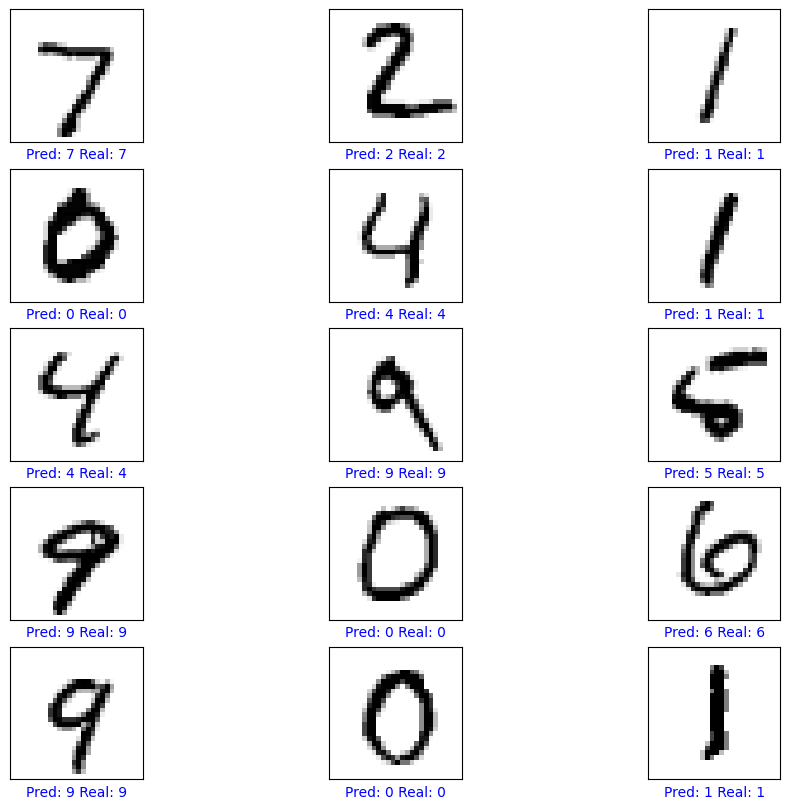

In [15]:
filas = 5
columnas = 3
numero_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas,2*filas))

for i in range(numero_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    ver_imagen(predicciones[i], etiquetas_prueba[i], imagenes_prueba[i]);